<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/LDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle

In [ ]:
DATA_PATH = 'drive/My Drive/Topic_Modeling/Dataset/'

In [ ]:
folder = os.listdir(DATA_PATH)

df = pd.DataFrame()

for file_name in folder:
  df_temp= pd.read_excel(DATA_PATH + file_name)
  df_temp = df_temp[['TI', 'SO', 'PY','AB']]
  df= pd.concat([df, df_temp], ignore_index=True)

In [ ]:
df

,TI,SO,PY,AB
0,TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PI...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERAC...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CON...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,MORE THAN A FEELING? TOWARD A THEORY OF CUSTOM...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIO...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
...,...,...,...,...
10947,A COMMENTARY ON THE CASE STUDY OF STATE-OWNED ...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE COMPARISON OF STEPHEN RUSHMORE'S SEVEN HOT...
10948,COMMENTARY ON A CASE STUDY OF STATE-OWNED HOTE...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE RECENT LIQUIDITY CRISIS IN THE GLOBAL HOTE...
10949,A MULTIDIMENSIONAL SCALE OF SWITCHING BARRIERS...,CORNELL HOSPITALITY QUARTERLY,2011.0,THIS RESEARCH ATTEMPTED TO DEVELOP A MEASUREME...
10950,A COMPARISON OF COLD-WATER THAWING OPTIONS IN ...,CORNELL HOSPITALITY QUARTERLY,2011.0,CONSIDERING ALL TYPES OF RESTAURANTS IN HONG K...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10952 entries, 0 to 10951
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TI      10952 non-null  object 
 1   SO      10952 non-null  object 
 2   PY      10535 non-null  float64
 3   AB      10874 non-null  object 
dtypes: float64(1), object(3)
memory usage: 342.4+ KB


In [ ]:
df.columns = ['Title', 'Journal', 'Year', 'Abstract']

In [ ]:
df['Abstract'].isnull().sum()

78

In [ ]:
df[df['Abstract'].isnull()]

,Title,Journal,Year,Abstract
884,EDITORIAL BOARD,CURRENT ISSUES IN TOURISM,2017.0,NaN
1005,THE ROLE OF DESTINATION PERSONALITY IN PREDICT...,CURRENT ISSUES IN TOURISM,2015.0,NaN
1006,MIGRATION AND INBOUND TOURISM: AN ITALIAN PERS...,CURRENT ISSUES IN TOURISM,2015.0,NaN
1007,THE NATIONAL GOVERNMENT AS THE FACILITATOR OF ...,CURRENT ISSUES IN TOURISM,2015.0,NaN
1008,AIRBNB: DISRUPTIVE INNOVATION AND THE RISE OF ...,CURRENT ISSUES IN TOURISM,2015.0,NaN
...,...,...,...,...
10290,CHARACTERISTICS OF JAPANESE PORT POLICY: STRAT...,RESEARCH IN TRANSPORTATION BUSINESS AND MANAGE...,2017.0,NaN
10293,PORT GOVERNANCE AND POLICY CHANGES IN BELGIUM ...,RESEARCH IN TRANSPORTATION BUSINESS AND MANAGE...,2017.0,NaN
10294,"LIONSORGAZELLES? THEPAST, PRESENTANDFUTUREOFAF...",RESEARCH IN TRANSPORTATION BUSINESS AND MANAGE...,2017.0,NaN
10303,STRATEGY FORMULATION OF NEW GENERATION PORTS: ...,RESEARCH IN TRANSPORTATION BUSINESS AND MANAGE...,2017.0,NaN


In [ ]:
mis = df[df['Abstract'].isnull()]

In [ ]:
mis.to_excel('drive/My Drive/Topic_Modeling/missing.xlsx')

In [ ]:
df.dropna(subset=['Abstract'], inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10874 entries, 0 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     10874 non-null  object 
 1   Journal   10874 non-null  object 
 2   Year      10457 non-null  float64
 3   Abstract  10874 non-null  object 
dtypes: float64(1), object(3)
memory usage: 339.9+ KB


In [ ]:
df.to_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df = pd.read_pickle("drive/My Drive/Topic_Modeling/topic_df.pkl")

In [ ]:
df

,Title,Journal,Year,Abstract
0,TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PI...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMEN...
1,EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERAC...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING...
2,DEMOGRAPHIC AND ATTITUDINAL ANTECEDENTS OF CON...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PL...
3,MORE THAN A FEELING? TOWARD A THEORY OF CUSTOM...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE RESPONDING TO AN INCREASING CALL FOR A...
4,ACCOUNTABLE ALGORITHMS? THE ETHICAL IMPLICATIO...,JOURNAL OF SERVICE MANAGEMENT,NaN,PURPOSE THE PURPOSE OF THIS STUDY IS TO IDENTI...
...,...,...,...,...
10869,A COMMENTARY ON THE CASE STUDY OF STATE-OWNED ...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE COMPARISON OF STEPHEN RUSHMORE'S SEVEN HOT...
10870,COMMENTARY ON A CASE STUDY OF STATE-OWNED HOTE...,CORNELL HOSPITALITY QUARTERLY,2011.0,THE RECENT LIQUIDITY CRISIS IN THE GLOBAL HOTE...
10871,A MULTIDIMENSIONAL SCALE OF SWITCHING BARRIERS...,CORNELL HOSPITALITY QUARTERLY,2011.0,THIS RESEARCH ATTEMPTED TO DEVELOP A MEASUREME...
10872,A COMPARISON OF COLD-WATER THAWING OPTIONS IN ...,CORNELL HOSPITALITY QUARTERLY,2011.0,CONSIDERING ALL TYPES OF RESTAURANTS IN HONG K...


In [ ]:
df.groupby('Journal')['Abstract'].count()

Journal
ANNALS OF TOURISM RESEARCH                                       706
CORNELL HOSPITALITY QUARTERLY                                    331
CURRENT ISSUES IN TOURISM                                        944
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT    1037
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT                 1372
INTERNATIONAL JOURNAL OF TOURISM RESEARCH                        552
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT                    259
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT                    241
JOURNAL OF SERVICE MANAGEMENT                                    316
JOURNAL OF SUSTAINABLE TOURISM                                   746
JOURNAL OF TRAVEL & TOURISM MARKETING                            624
JOURNAL OF TRAVEL RESEARCH                                       686
JOURNAL OF VACATION MARKETING                                    177
RESEARCH IN TRANSPORTATION BUSINESS AND MANAGEMENT               195
SCANDINAVIAN JOURNAL OF HO

In [ ]:
order = df.Journal.value_counts(ascending=True).index

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


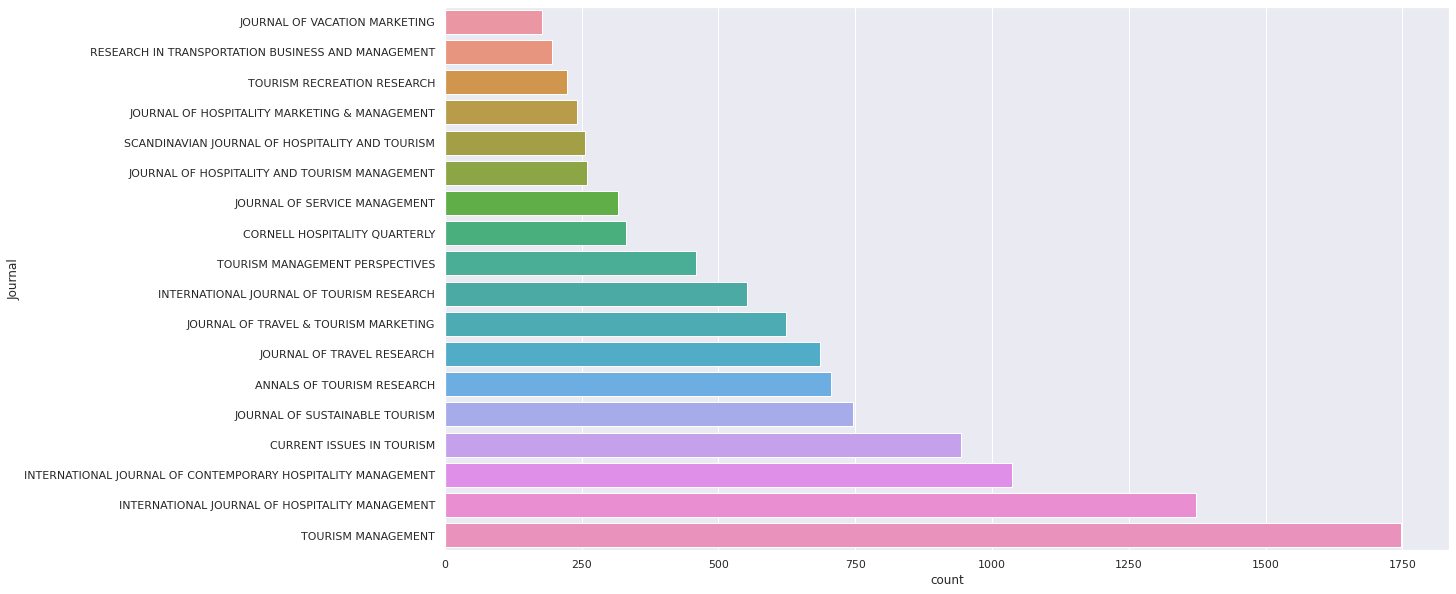

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(y='Journal', data=df, orient='h', order=order);

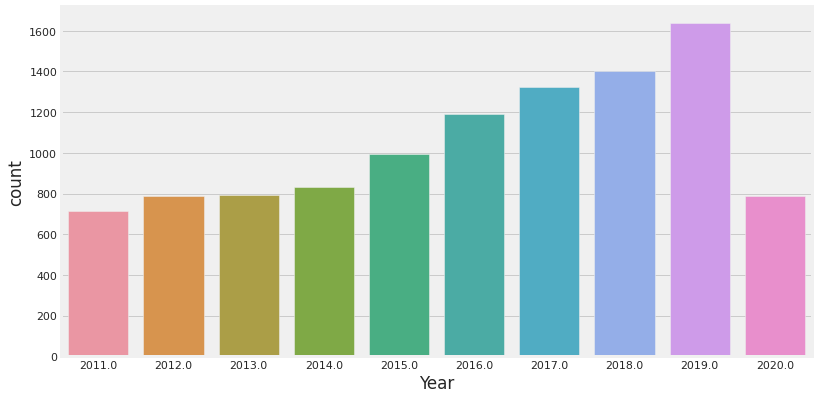

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, orient='v');

In [ ]:
pd.crosstab(df.Journal, df.Year, dropna=False) 

Year,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Journal,,,,,,,,,,
ANNALS OF TOURISM RESEARCH,66,87,74,73,54,60,71,56,114,51
CORNELL HOSPITALITY QUARTERLY,47,31,35,35,33,33,28,34,29,15
CURRENT ISSUES IN TOURISM,42,53,44,55,62,72,105,116,141,88
INTERNATIONAL JOURNAL OF CONTEMPORARY HOSPITALITY MANAGEMENT,53,52,55,63,86,115,137,172,217,73
INTERNATIONAL JOURNAL OF HOSPITALITY MANAGEMENT,110,144,167,139,131,106,94,120,236,125
INTERNATIONAL JOURNAL OF TOURISM RESEARCH,39,41,44,58,57,57,63,74,72,29
JOURNAL OF HOSPITALITY AND TOURISM MANAGEMENT,0,0,0,0,13,47,60,40,73,26
JOURNAL OF HOSPITALITY MARKETING & MANAGEMENT,0,0,0,0,34,42,44,42,40,16
JOURNAL OF SERVICE MANAGEMENT,30,32,26,32,35,35,36,38,29,5


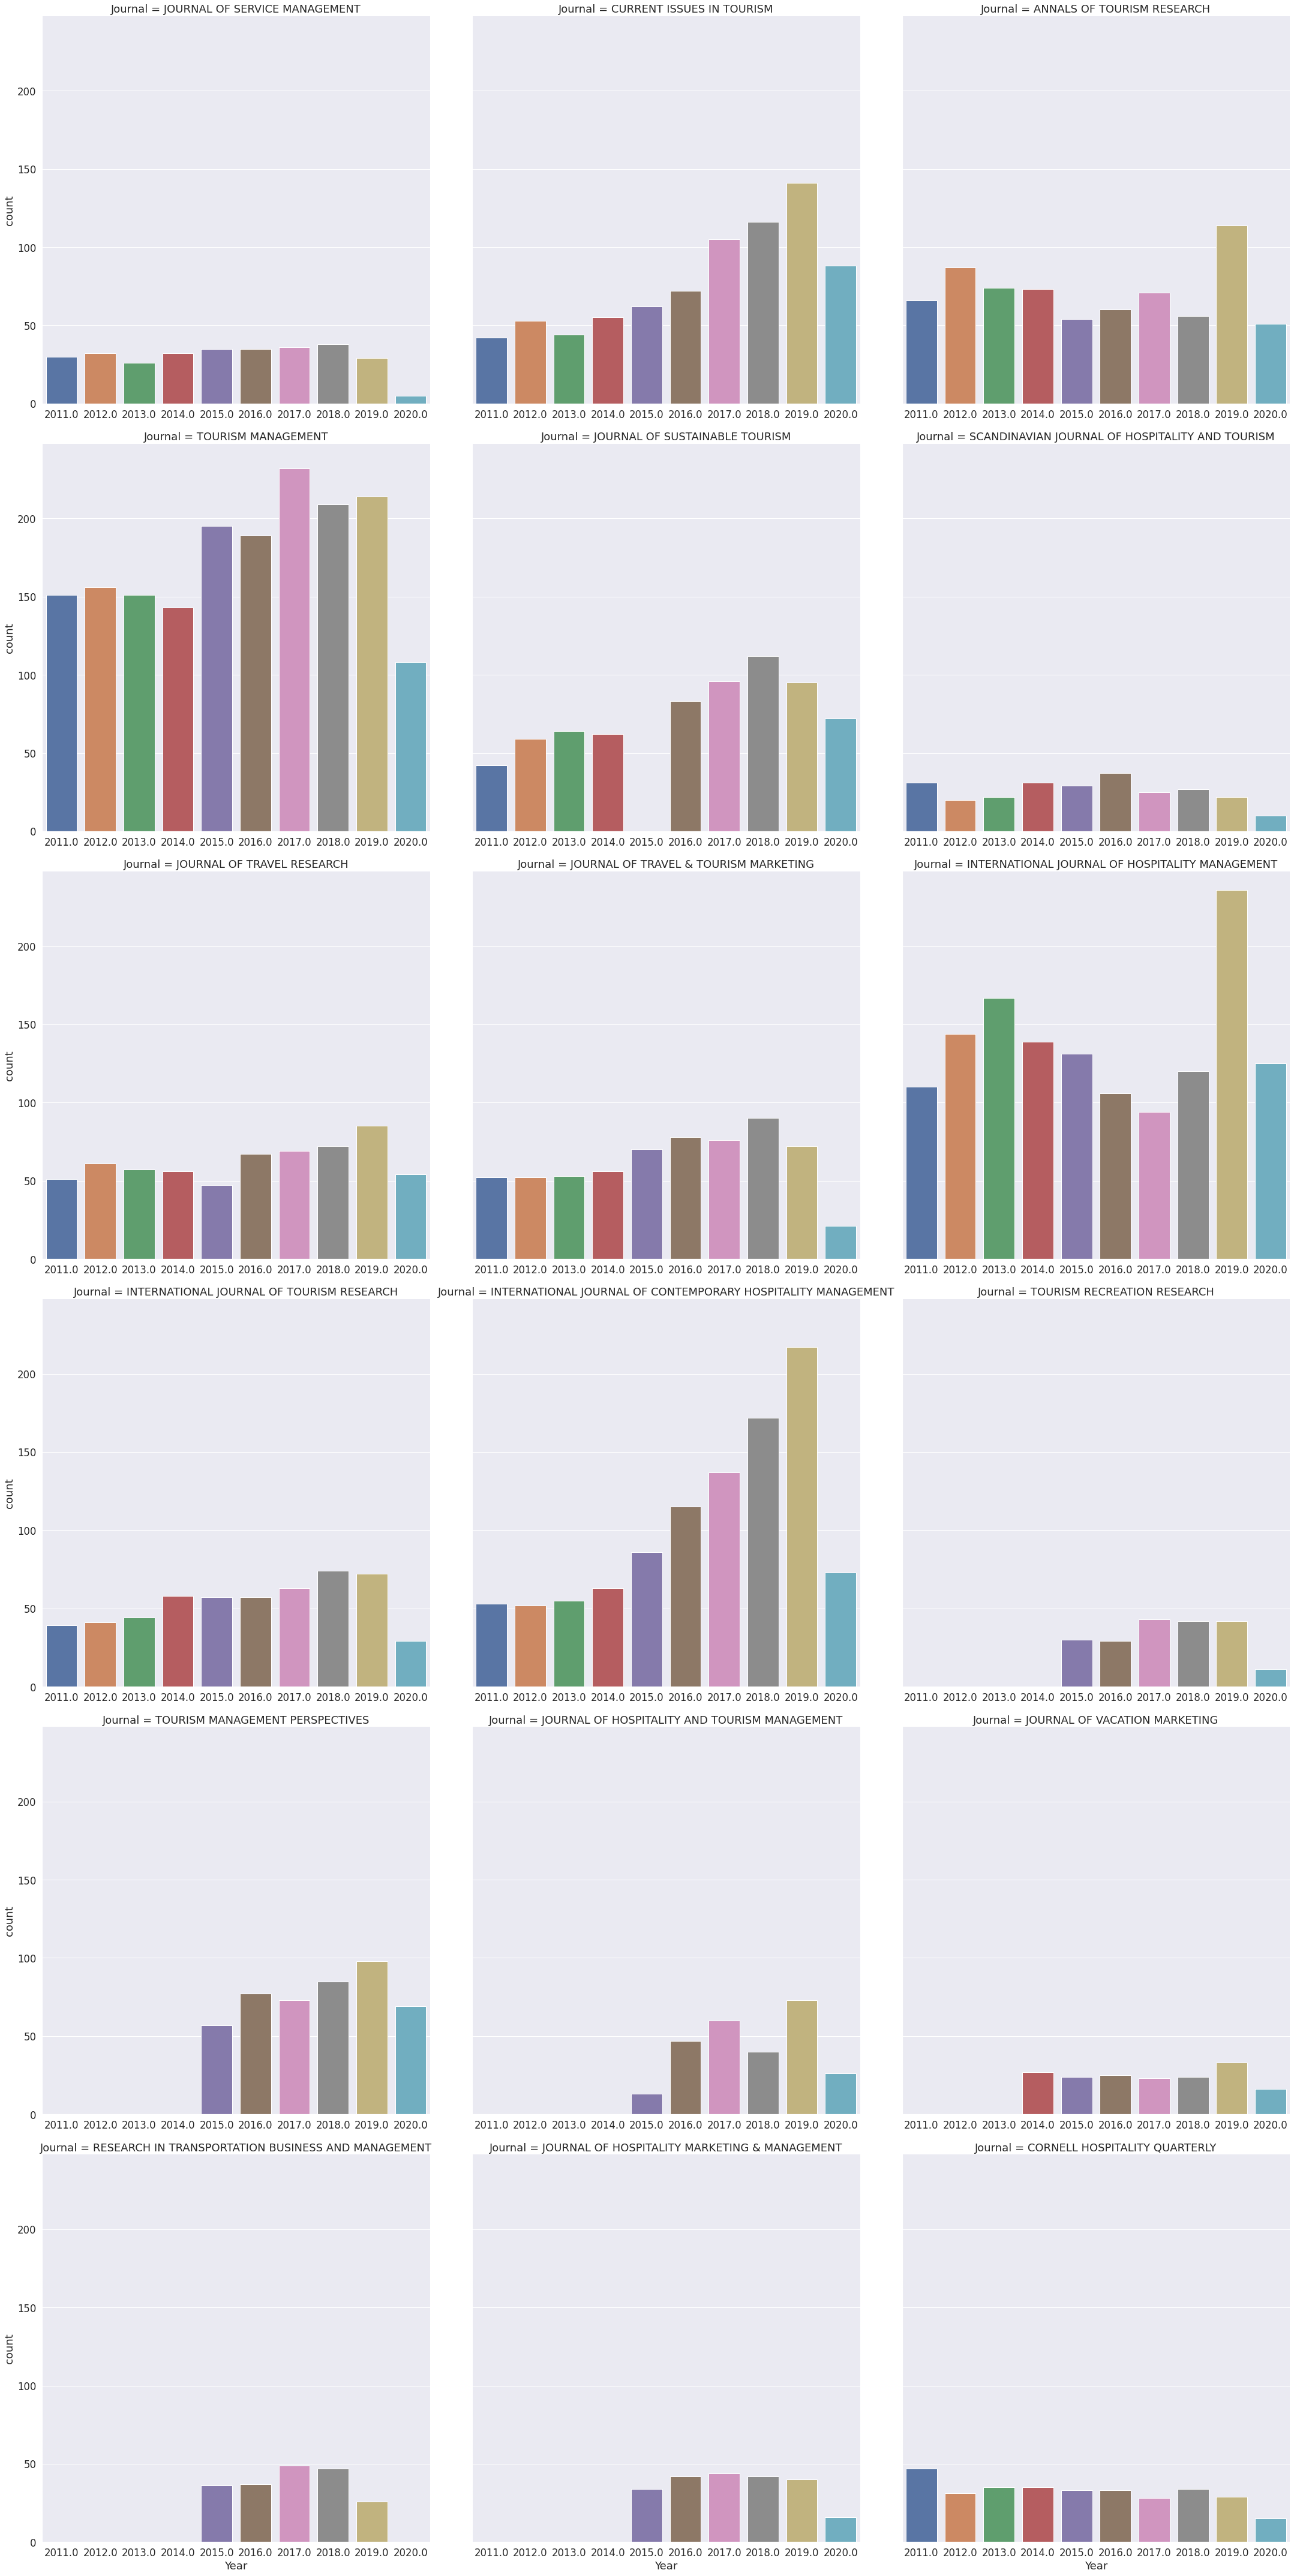

In [ ]:
sns.set(font_scale=1.5)

sns.catplot(data=df, x='Year', col="Journal", col_wrap=3, sharex=False, height=10, kind='count')


In [ ]:
papers = list(df.Abstract.values)

NameError: ignored

In [ ]:
len(papers)

10874

In [ ]:
print(papers[0][:1000])

PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH P

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

In [ ]:
def normalize_corpus(papers):
  norm_papers = []
  for paper in papers:
    paper = paper.lower()
    paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
    paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
    paper_tokens = [token for token in paper_tokens if len(token) > 1]
    paper_tokens = [token for token in paper_tokens if token not in stop_words]
    
    paper_tokens = list(filter(None, paper_tokens))
    if paper_tokens:
      norm_papers.append(paper_tokens)
  return norm_papers

In [ ]:
norm_papers = normalize_corpus(papers)
print(len(norm_papers))

10874


In [ ]:
# viewing a processed paper
print(norm_papers[0][:50])

['purpose', 'article', 'examines', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'model', 'examines', 'potential', 'synergy', 'challenge', 'platform', 'add', 'pipeline', 'component', 'vice', 'versa', 'pipeline', 'business', 'design', 'methodology', 'approach', 'paper', 'us', 'conceptual', 'approach', 'synthesizes', 'integrates', 'literature', 'service', 'hospitality', 'strategy', 'supplement', 'two', 'illustrative', 'mini', 'case', 'study', 'finding', 'extant', 'literature', 'typically', 'focus', 'dichotomy', 'incumbent', 'pipeline', 'business']


In [ ]:
import gensim


In [ ]:
bigram = gensim.models.Phrases(norm_papers, min_count=20, threshold=20, delimiter=b'_') # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)

In [ ]:
# sample demonstration
print(bigram_model[norm_papers[0]][:50])

['purpose', 'article', 'examines', 'new', 'phenomenon', 'convergence', 'platform', 'pipeline', 'business', 'model', 'examines', 'potential', 'synergy', 'challenge', 'platform', 'add', 'pipeline', 'component', 'vice', 'versa', 'pipeline', 'business', 'design_methodology', 'approach', 'paper', 'us', 'conceptual', 'approach', 'synthesizes', 'integrates', 'literature', 'service', 'hospitality', 'strategy', 'supplement', 'two', 'illustrative', 'mini', 'case', 'study', 'finding', 'extant_literature', 'typically', 'focus', 'dichotomy', 'incumbent', 'pipeline', 'business', 'create', 'value']


Let’s generate phrases for all our tokenized research papers and build a vocabulary that will help us obtain a unique term/phrase to number mapping (since machine or deep learning only works on numeric tensors).

In [ ]:
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_papers]

In [ ]:
# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)

print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'activity'), (1, 'add'), (2, 'adopting'), (3, 'also'), (4, 'approach'), (5, 'article'), (6, 'asset'), (7, 'business'), (8, 'case'), (9, 'challenge'), (10, 'characteristic'), (11, 'common'), (12, 'component'), (13, 'conceptual'), (14, 'conceptualize')]
Total Vocabulary Size: 23845


Several of these terms are not very useful since they are specific to a paper or even a paragraph in a research paper. Hence, it is time to prune
our vocabulary and start removing terms. Leveraging document frequency is a great way to achieve this. By now, you probably realize that the document frequency of a term is basically the total number of times that term occurs across all the documents in a corpus.

In [ ]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.

dictionary.filter_extremes(no_below=20, no_above=0.6)

print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 4384


In [ ]:
print('Sample word to number mappings:', list(dictionary.items())[:15])

Sample word to number mappings: [(0, 'activity'), (1, 'add'), (2, 'adopting'), (3, 'also'), (4, 'approach'), (5, 'article'), (6, 'asset'), (7, 'business'), (8, 'case'), (9, 'challenge'), (10, 'characteristic'), (11, 'common'), (12, 'component'), (13, 'conceptual'), (14, 'conceptualize')]


We removed all terms that occur fewer than 20 times across all documents and all
terms that occur in more than 60% of all the documents. We are interested in finding different themes and topics and not recurring themes. Hence, this suits our scenario perfectly. We can now perform feature engineering by leveraging a simple Bag of Words model.

In [ ]:
# Transforming corpus into bag of words vectors

bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(4, 2), (23, 1), (37, 1), (44, 1), (55, 3), (61, 1), (62, 3), (71, 1), (78, 2), (87, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 3), (107, 2), (108, 7), (109, 2), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 2), (121, 3), (122, 2), (123, 1), (124, 1), (125, 1), (126, 1), (127, 1), (128, 1), (129, 2)]


In [ ]:
# viewing actual terms and their counts
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:50]])

[('approach', 2), ('design_methodology', 1), ('finding', 1), ('identify', 1), ('model', 3), ('originality_value', 1), ('paper', 3), ('purpose', 1), ('service', 2), ('typically', 1), ('active', 1), ('agency', 1), ('arguing', 1), ('ass', 1), ('assessing', 1), ('behavior', 1), ('benefit', 1), ('build', 1), ('centered', 1), ('classical', 1), ('conceptually', 1), ('contemporary', 1), ('creating', 1), ('customer', 1), ('develops', 1), ('dominant', 1), ('effectiveness', 3), ('emphasizing', 2), ('employee', 7), ('engage', 2), ('enhance', 1), ('equally', 1), ('factor_influencing', 1), ('firm', 1), ('frontline', 1), ('gap', 1), ('high', 1), ('illustrates', 1), ('important', 1), ('influence', 1), ('initiative', 2), ('interaction', 3), ('interactive', 2), ('introduced', 1), ('involvement', 1), ('knowledge', 1), ('management', 1), ('matched', 1), ('measure', 1), ('organization', 2)]


In [ ]:
# total papers in the corpus

print('Total number of papers:', len(bow_corpus))

Total number of papers: 10874


### Latent Dirichlet Allocation

In [ ]:
TOTAL_TOPICS = 10

In [ ]:
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, chunksize=1740, alpha='auto',
                                   eta='auto', random_state=42, iterations=500, num_topics=TOTAL_TOPICS,
                                   passes=20, eval_every=None)

Viewing the topics in our trained topic model is quite easy and we can generate them with the following code.

In [ ]:
for topic_id, topic in lda_model.print_topics(num_topics=10, num_words=20):
  print('Topic #'+str(topic_id+1)+':')
  print(topic)
  print()

Topic #1:
0.053*"employee" + 0.028*"brand" + 0.021*"relationship" + 0.016*"effect" + 0.015*"behavior" + 0.013*"job" + 0.012*"work" + 0.011*"trust" + 0.011*"green" + 0.010*"model" + 0.009*"perceived" + 0.009*"finding" + 0.009*"hospitality" + 0.009*"performance" + 0.009*"positive" + 0.009*"wa" + 0.009*"organizational" + 0.008*"influence" + 0.008*"csr" + 0.008*"result"

Topic #2:
0.100*"hotel" + 0.020*"firm" + 0.019*"performance" + 0.015*"guest" + 0.015*"restaurant" + 0.011*"manager" + 0.010*"industry" + 0.009*"effect" + 0.007*"result" + 0.006*"factor" + 0.006*"efficiency" + 0.006*"analysis" + 0.006*"chain" + 0.006*"management" + 0.005*"also" + 0.005*"finding" + 0.005*"wa" + 0.005*"level" + 0.005*"job_satisfaction" + 0.005*"financial"

Topic #3:
0.067*"customer" + 0.031*"satisfaction" + 0.027*"service" + 0.020*"experience" + 0.018*"restaurant" + 0.018*"value" + 0.017*"loyalty" + 0.015*"consumer" + 0.012*"effect" + 0.011*"perceived" + 0.010*"quality" + 0.009*"finding" + 0.009*"influence" +

all the weights are the same sign and tell us the importance of each term in the topic. We can also view the overall mean coherence score of the model.

In [ ]:
topics_coherences = lda_model.top_topics(bow_corpus, topn=20)

avg_coherence_score = np.mean([item[1] for item in topics_coherences])

print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -2.085661850663448


Let’s now look at the output of our LDA topic model in an easier to understand format. One way is to visualize the topics as tuples of terms and weights.

In [ ]:
topics_with_wts = [item[0] for item in topics_coherences]

print('LDA Topics with Weights')
print('='*50)

for idx, topic in enumerate(topics_with_wts):
  print('Topic #'+str(idx+1)+':')
  print([(term, round(wt, 3)) for wt, term in topic])
  print()

LDA Topics with Weights
Topic #1:
[('customer', 0.067), ('satisfaction', 0.031), ('service', 0.027), ('experience', 0.02), ('restaurant', 0.018), ('value', 0.018), ('loyalty', 0.017), ('consumer', 0.015), ('effect', 0.012), ('perceived', 0.011), ('quality', 0.01), ('finding', 0.009), ('influence', 0.009), ('relationship', 0.008), ('service_quality', 0.008), ('research', 0.008), ('positive', 0.007), ('impact', 0.007), ('intention', 0.007), ('result', 0.006)]

Topic #2:
[('tourism', 0.048), ('impact', 0.01), ('economic', 0.009), ('ha', 0.008), ('country', 0.008), ('policy', 0.007), ('development', 0.007), ('paper', 0.006), ('destination', 0.006), ('industry', 0.005), ('analysis', 0.005), ('region', 0.005), ('change', 0.005), ('effect', 0.005), ('elsevier_ltd', 0.004), ('international', 0.004), ('right_reserved', 0.004), ('tourist', 0.004), ('also', 0.004), ('result', 0.004)]

Topic #3:
[('tourist', 0.042), ('destination', 0.034), ('visitor', 0.015), ('model', 0.01), ('image', 0.01), ('fa

We can also view the topics as a list of terms without the weights when we want to understand the context or theme conveyed by each topic.

In [ ]:
print('LDA Topics without Weights')
print('='*50)

for idx, topic in enumerate(topics_with_wts):
  print('Topic #'+str(idx+1)+':')
  print([term for wt, term in topic])
  print()

LDA Topics without Weights
Topic #1:
['customer', 'satisfaction', 'service', 'experience', 'restaurant', 'value', 'loyalty', 'consumer', 'effect', 'perceived', 'quality', 'finding', 'influence', 'relationship', 'service_quality', 'research', 'positive', 'impact', 'intention', 'result']

Topic #2:
['tourism', 'impact', 'economic', 'ha', 'country', 'policy', 'development', 'paper', 'destination', 'industry', 'analysis', 'region', 'change', 'effect', 'elsevier_ltd', 'international', 'right_reserved', 'tourist', 'also', 'result']

Topic #3:
['tourist', 'destination', 'visitor', 'model', 'image', 'factor', 'analysis', 'wa', 'travel', 'attribute', 'based', 'result', 'chinese', 'motivation', 'using', 'perception', 'different', 'survey', 'tourism', 'research']

Topic #4:
['research', 'hospitality', 'food', 'paper', 'approach', 'finding', 'literature', 'analysis', 'industry', 'article', 'management', 'ha', 'method', 'implication', 'service', 'marketing', 'originality_value', 'design_methodology

We can use perplexity and coherence scores as measures to evaluate the topic
model. Typically, lower the perplexity, the better the model. Similarly, the lower the UMass score and the higher the Cv score in coherence, the better the model.

In [ ]:
cv_coherence_model_lda = gensim.models.CoherenceModel( model=lda_model, corpus=bow_corpus, texts=norm_corpus_bigrams,
                                                      dictionary=dictionary, coherence='c_v')

avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel( model=lda_model, corpus=bow_corpus, texts=norm_corpus_bigrams,
                                                          dictionary=dictionary, coherence='u_mass')


In [ ]:
avg_coherence_umass = umass_coherence_model_lda.get_coherence()
perplexity = lda_model.log_perplexity(bow_corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.3869236089843916
Avg. Coherence Score (UMass): -2.085661850663448
Model Perplexity: -7.256898385544218


### LDA Models with MALLET

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-01 10:56:21--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  8.84MB/s    in 1.7s    

2020-06-01 10:56:23 (8.84 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
MALLET_PATH = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
lda_mallet = gensim.models.wrappers.LdaMallet( mallet_path=MALLET_PATH, corpus=bow_corpus,
                                              num_topics=TOTAL_TOPICS, id2word=dictionary,
                                               iterations=500, workers=16)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


We can now look at the generated topics by leveraging the following code snippet.

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in lda_mallet.show_topic(n, topn=20)] for n in range(0, TOTAL_TOPICS)]


In [ ]:
for idx, topic in enumerate(topics):
  print('Topic #'+str(idx+1)+':')
  print([term for term, wt in topic])
  print()

Topic #1:
['tourism', 'development', 'ha', 'economic', 'country', 'event', 'policy', 'paper', 'sector', 'impact', 'industry', 'region', 'global', 'city', 'international', 'economy', 'article', 'potential', 'area', 'china']

Topic #2:
['tourist', 'destination', 'experience', 'travel', 'visitor', 'activity', 'motivation', 'behaviour', 'group', 'chinese', 'choice', 'cultural', 'visit', 'segment', 'site', 'preference', 'trip', 'attraction', 'survey', 'respondent']

Topic #3:
['employee', 'performance', 'manager', 'firm', 'industry', 'finding', 'management', 'work', 'relationship', 'innovation', 'hospitality', 'theory', 'company', 'organization', 'level', 'job', 'organizational', 'approach', 'engagement', 'design_methodology']

Topic #4:
['consumer', 'information', 'online', 'product', 'response', 'traveler', 'interaction', 'consumption', 'influence', 'review', 'based', 'social', 'theory', 'website', 'social_medium', 'communication', 'festival', 'type', 'user', 'marketing']

Topic #5:
['ana

We can also evaluate our model using the perplexity and coherence metrics, as we
did before.

In [ ]:
cv_coherence_model_lda_mallet = gensim.models. CoherenceModel (model=lda_mallet, corpus=bow_corpus,
                                                               texts=norm_corpus_bigrams, dictionary=dictionary,
                                                               coherence='c_v')

avg_coherence_cv = cv_coherence_model_lda_mallet.get_coherence()

umass_coherence_model_lda_mallet = gensim.models. CoherenceModel (model=lda_mallet, corpus=bow_corpus,
                                                                   texts=norm_corpus_bigrams, dictionary=dictionary,
                                                                  coherence='u_mass') 

avg_coherence_umass = umass_coherence_model_lda_mallet.get_coherence()

In [ ]:
# from STDOUT: <500> LL/token: -8.53533
perplexity = -8.53533

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (Cv): 0.4336742441356744
Avg. Coherence Score (UMass): -2.138265245745629
Model Perplexity: -8.53533


In [ ]:
lda_mallet

In [ ]:
lda_mallet[bow_corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[[(0, 0.1205897840968931),
  (1, 0.03317535545023697),
  (2, 0.14375987361769352),
  (3, 0.17166929963138494),
  (4, 0.1627172195892575),
  (5, 0.034228541337546076),
  (6, 0.06055818852027383),
  (7, 0.13428120063191154),
  (8, 0.10005265929436545),
  (9, 0.03896787783043707)],
 [(0, 0.03938115330520395),
  (1, 0.11462728551336147),
  (2, 0.2524613220815753),
  (3, 0.1047819971870605),
  (4, 0.09353023909985937),
  (5, 0.07313642756680733),
  (6, 0.08157524613220817),
  (7, 0.1638537271448664),
  (8, 0.03586497890295359),
  (9, 0.04078762306610408)],
 [(0, 0.05181023720349563),
  (1, 0.0568039950062422),
  (2, 0.08926342072409488),
  (3, 0.23220973782771537),
  (4, 0.04556803995006242),
  (5, 0.1285892634207241),
  (6, 0.046192259675405745),
  (7, 0.1285892634207241),
  (8, 0.11298377028714107),
  (9, 0.10799001248439451)],
 [(0, 0.045088566827697255),
  (1, 0.047772410091250654),
  (2, 0.08803005904455179),
  (3, 0.09715512614063336),
  (4, 0.09017713365539451),
  (5, 0.0955448201825

You can clearly see that the model from MALLET is much better based on these
metrics as compared to the default LDA model from Gensim. Can we find the optimal number of topics that maximizes the coherence? This is a tough problem, but we can try doing it iteratively.

### LDA Tuning: Finding the Optimal Number of Topics

Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score. To implement this method, we build the following function.

In [ ]:
from tqdm import tqdm

def topic_model_coherence_generator(corpus, texts, dictionary, start_topic_count=2, end_topic_count=10, step=1, cpus=1):
  models = []
  coherence_scores = []
  for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
    mallet_lda_model = gensim.models.wrappers. LdaMallet (mallet_path=MALLET_PATH, corpus=corpus, num_topics=topic_nums,
                                                            id2word=dictionary, iterations=500, workers=cpus)
      
    cv_coherence_model_mallet_lda = gensim. models.CoherenceModel (model=mallet_lda_model, corpus=corpus, texts=texts,
                                                                     dictionary=dictionary, coherence='c_v')
      
    coherence_score = cv_coherence_model_mallet_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(mallet_lda_model)
  return models, coherence_scores

* Let’s put this function into action now and build several topic models, with the number of topics ranging from 2 to 30.

In [ ]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus, texts=norm_corpus_bigrams, dictionary=dictionary,
                                                               start_topic_count=2, end_topic_count=30, step=1, cpus=16)

  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
100%|██████████| 29/29 [36:04<00:00, 74.65s/it]


In [ ]:
pickle.dump(lda_models, open("drive/My Drive/Topic_Modeling/lda_models.pkl", "wb"))

In [ ]:
pickle.dump(coherence_scores, open("drive/My Drive/Topic_Modeling/coherence_scores.pkl", "wb"))

In [ ]:
lda_models = pickle.load(open("drive/My Drive/Topic_Modeling/lda_models.pkl", "rb"))

In [ ]:
coherence_scores = pickle.load(open("drive/My Drive/Topic_Modeling/coherence_scores.pkl", "rb"))

In [ ]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1), 'Coherence Score': np.round(coherence_scores, 4)})

coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
21,23,0.4468
3,5,0.4451
14,16,0.4429
13,15,0.4363
19,21,0.4362
26,28,0.4356
28,30,0.4344
25,27,0.4323
6,8,0.4317
15,17,0.4312


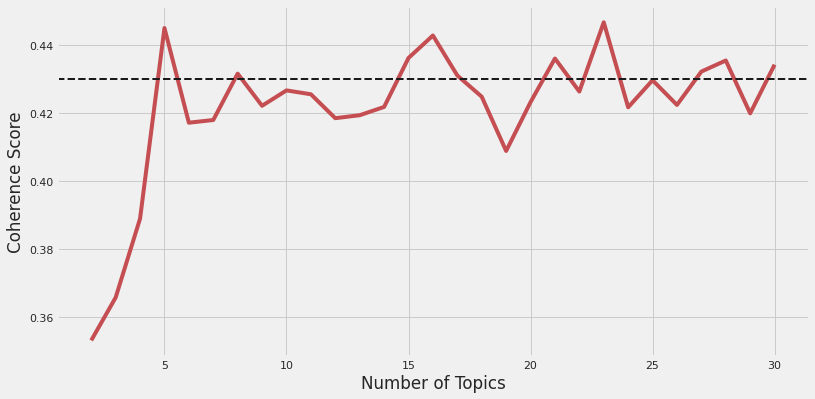

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


x_ax = range(2, 31, 1)
y_ax = coherence_scores

plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')

plt.axhline(y=0.43, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'

xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

plt.show()

* it looks like the score starts increasing rapidly when the number of
topics is five and gradually starts plateauing at 19 or 20.

In [ ]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 10].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

10

* Let’s view all the 20 topics generated by our selected best model, similar to our
previous models.

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in best_lda_model.show_topic(n, topn=10)] for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
  print('Topic #'+str(idx+1)+':')
  print([term for term, wt in topic])
  print()

Topic #1:
['model', 'data', 'analysis', 'based', 'information', 'method', 'online', 'green', 'result', 'social_medium']

Topic #2:
['social', 'practice', 'process', 'management', 'paper', 'environmental', 'stakeholder', 'business', 'system', 'knowledge']

Topic #3:
['employee', 'relationship', 'finding', 'work', 'behavior', 'effect', 'manager', 'level', 'support', 'wa']

Topic #4:
['customer', 'satisfaction', 'consumer', 'perceived', 'influence', 'intention', 'restaurant', 'effect', 'perception', 'loyalty']

Topic #5:
['tourism', 'development', 'community', 'local', 'ha', 'resident', 'area', 'benefit', 'sustainable', 'activity']

Topic #6:
['research', 'service', 'approach', 'paper', 'hospitality', 'finding', 'literature', 'innovation', 'implication', 'marketing']

Topic #7:
['tourist', 'destination', 'experience', 'visitor', 'event', 'cultural', 'place', 'chinese', 'site', 'image']

Topic #8:
['tourism', 'impact', 'country', 'international', 'demand', 'economic', 'model', 'market', 'r

* A better way of visualizing the topics is to build a term-topic dataframe, as depicted.

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Term1,model,social,employee,customer,tourism,research,tourist,tourism,travel,hotel
Term2,data,practice,relationship,satisfaction,development,service,destination,impact,group,brand
Term3,analysis,process,finding,consumer,community,approach,experience,country,wa,firm
Term4,based,management,work,perceived,local,paper,visitor,international,factor,performance
Term5,information,paper,behavior,influence,ha,hospitality,event,demand,risk,industry
Term6,method,environmental,effect,intention,resident,finding,cultural,economic,behaviour,strategy
Term7,online,stakeholder,manager,restaurant,area,literature,place,model,product,price
Term8,green,business,level,effect,benefit,innovation,chinese,market,difference,factor
Term9,result,system,support,perception,sustainable,implication,site,region,traveler,guest
Term10,social_medium,knowledge,wa,loyalty,activity,marketing,image,growth,motivation,right_reserved


* Another easy way to view the topics is to create a topic-term dataframe, whereby each topic is represented in a row with the terms of the topic being represented as a comma-separated string.

In [ ]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)] )

topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"model, data, analysis, based, information, method, online, green, result, social_medium"
Topic2,"social, practice, process, management, paper, environmental, stakeholder, business, system, knowledge"
Topic3,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa"
Topic4,"customer, satisfaction, consumer, perceived, influence, intention, restaurant, effect, perception, loyalty"
Topic5,"tourism, development, community, local, ha, resident, area, benefit, sustainable, activity"
Topic6,"research, service, approach, paper, hospitality, finding, literature, innovation, implication, marketing"
Topic7,"tourist, destination, experience, visitor, event, cultural, place, chinese, site, image"
Topic8,"tourism, impact, country, international, demand, economic, model, market, region, growth"
Topic9,"travel, group, wa, factor, risk, behaviour, product, difference, traveler, motivation"
Topic10,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved"


### Interpreting Topic Model Results

An interesting point to remember is, given a corpus of documents (in the form of
features, e.g., Bag of Words) and a trained topic model, you can predict the distribution of topics in each document (research paper in this case) with the following code.

In [ ]:
tm_results = best_lda_model[bow_corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

In [ ]:
best_lda_model.show_topics(num_topics=10)

[(0,
  '0.032*"model" + 0.028*"data" + 0.028*"analysis" + 0.027*"based" + 0.021*"information" + 0.015*"method" + 0.014*"online" + 0.011*"green" + 0.008*"result" + 0.008*"social_medium"'),
 (1,
  '0.027*"social" + 0.020*"practice" + 0.019*"process" + 0.019*"management" + 0.018*"paper" + 0.017*"environmental" + 0.014*"stakeholder" + 0.014*"business" + 0.014*"system" + 0.013*"knowledge"'),
 (2,
  '0.040*"employee" + 0.031*"relationship" + 0.019*"finding" + 0.019*"work" + 0.015*"behavior" + 0.015*"effect" + 0.014*"manager" + 0.014*"level" + 0.014*"support" + 0.012*"wa"'),
 (3,
  '0.060*"customer" + 0.034*"satisfaction" + 0.029*"consumer" + 0.027*"perceived" + 0.026*"influence" + 0.018*"intention" + 0.017*"restaurant" + 0.017*"effect" + 0.015*"perception" + 0.014*"loyalty"'),
 (4,
  '0.173*"tourism" + 0.040*"development" + 0.021*"community" + 0.017*"local" + 0.016*"ha" + 0.015*"resident" + 0.013*"area" + 0.013*"benefit" + 0.011*"sustainable" + 0.010*"activity"'),
 (5,
  '0.071*"research" + 

### overcome the problem

In [ ]:
opt_lda_model = gensim.models.wrappers.LdaMallet(mallet_path=MALLET_PATH, corpus=bow_corpus,
                                              num_topics=10, id2word=dictionary,
                                               iterations=500, workers=16)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
pickle.dump(opt_lda_model, open("drive/My Drive/Topic_Modeling/opt_lda_model.pkl", "wb"))

In [ ]:
opt_lda_model = pickle.load(open("drive/My Drive/Topic_Modeling/opt_lda_model.pkl", "rb"))

In [ ]:
tm_results = opt_lda_model[bow_corpus]

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


We can now get the most dominant topic per research paper with some intelligent sorting and indexing using the following code.

In [ ]:
tm_results

[[(0, 0.043707214323328074),
  (1, 0.0926803580832017),
  (2, 0.29489204844655087),
  (3, 0.11427066877303846),
  (4, 0.08636124275934703),
  (5, 0.03844128488678252),
  (6, 0.053185887309110065),
  (7, 0.1537651395471301),
  (8, 0.09162717219589259),
  (9, 0.03106898367561875)],
 [(0, 0.05555555555555555),
  (1, 0.0949367088607595),
  (2, 0.16385372714486637),
  (3, 0.04571026722925457),
  (4, 0.05625879043600562),
  (5, 0.035864978902953586),
  (6, 0.09985935302390998),
  (7, 0.05555555555555555),
  (8, 0.18143459915611815),
  (9, 0.2109704641350211)],
 [(0, 0.04744069912609238),
  (1, 0.07677902621722846),
  (2, 0.1373283395755306),
  (3, 0.1017478152309613),
  (4, 0.08739076154806492),
  (5, 0.07365792759051186),
  (6, 0.1772784019975031),
  (7, 0.04868913857677903),
  (8, 0.08551810237203496),
  (9, 0.1641697877652934)],
 [(0, 0.028985507246376805),
  (1, 0.18840579710144922),
  (2, 0.18786902844873854),
  (3, 0.09930220075147608),
  (4, 0.03542673107890498),
  (5, 0.0343531937734

In [ ]:
len(tm_results)

10874

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

corpus_topics

[(2, 0.29489204844655087),
 (9, 0.2109704641350211),
 (6, 0.1772784019975031),
 (1, 0.18840579710144922),
 (2, 0.3563941299790357),
 (2, 0.23644986449864502),
 (6, 0.23220973782771537),
 (6, 0.270878721859114),
 (2, 0.399335232668566),
 (2, 0.20401757689893282),
 (2, 0.26068376068376076),
 (2, 0.21438746438746442),
 (9, 0.3477777777777778),
 (2, 0.3003472222222222),
 (2, 0.2896551724137931),
 (2, 0.2486772486772487),
 (2, 0.2929984779299848),
 (9, 0.21885521885521889),
 (2, 0.33865602129075184),
 (9, 0.18991331757289204),
 (6, 0.20223820943245405),
 (2, 0.22857142857142856),
 (9, 0.30395913154533843),
 (2, 0.41567963902989286),
 (3, 0.2343550446998723),
 (2, 0.3145917001338688),
 (2, 0.5085470085470086),
 (8, 0.29207920792079206),
 (2, 0.369047619047619),
 (2, 0.2455606291222729),
 (2, 0.30687830687830686),
 (2, 0.3123272526257601),
 (2, 0.3357915437561455),
 (2, 0.37810945273631846),
 (2, 0.14676616915422885),
 (2, 0.3212396069538927),
 (2, 0.3787085514834206),
 (2, 0.3112807463952502

In [ ]:
len(corpus_topics)

8988

This provides a plethora of options that can be leveraged to extract useful insights from our corpus of research papers. To enable this, we construct a master dataframe that will hold the base statistics, which we use soon to depict different useful insights.

In [ ]:
corpus_topic_df = pd.DataFrame()

corpus_topic_df['Document'] = range(0, len(papers))

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]

corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]

corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df['Paper'] = df.Title

corpus_topic_df['Abstract'] = df.Abstract

In [ ]:
corpus_topic_df

,Document,Dominant Topic,Contribution %,Topic Desc,Paper,Abstract
0,0,3,29.49,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa",TWO-DIRECTIONAL CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS,"PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH PEER-PROVIDED ASSETS ADOPTING DEFINING BUSINESS CHARACTERISTICS OF PIPELINES. FURTHERMORE, WE CONTRAST KEY CHARACTERISTICS OF THE THREE BUSINESS MODELS AND EXAMINE POTENTIAL SYNERGIES AND CHALLENGES FOR BUSINESS MODEL CONVERGENCE. OUR FINDINGS SUGGEST THAT CONVERGENCE FROM PIPELINES TO PLATFORMS WITH ASSET CONTROL SEEMS TO BE A NATURAL EXTENSION THAT OFFERS MANY POTENTIAL SYNERGIES AND RELATIVELY MINOR CHALLENGES. IN CONTRAST, CONVERGENCE FROM PIPELINES TO PLATFORMS WITH PEER-PROVIDED ASSETS IS LIKELY TO ENCOUNTER MORE SERIOUS CHALLENGES AND FEW SYNERGIES. FINALLY, THE SYNERGIES AND CHALLENGES OF CONVERGENCE FROM PLATFORMS WITH PEER-PROVIDED ASSETS TO PIPELINES SEEM TO BE IN BETWEEN THE OTHER TWO IN TERMS OF SYNERGIES AND CHALLENGES. PRACTICAL IMPLICATIONS THIS ARTICLE HELPS MANAGERS THINK THROUGH KEY CONSIDERATIONS REGARDING POTENTIAL SYNERGIES TO DEVELOP AND CHALLENGES TO MITIGATE FOR EMBARKING ON CONVERGENCE STRATEGIES BETWEEN PIPELINE AND PLATFORM BUSINESS MODELS. ORIGINALITY/VALUE THIS ARTICLE IS THE FIRST IN THE SERVICE, BUSINESS MODEL AND STRATEGY LITERATURE TO IDENTIFY, DEFINE, AND CONCEPTUALIZE BUSINESS MODEL CONVERGENCE BETWEEN PLATFORMS WITH ASSET CONTROL, THOSE WITH PEER-PROVIDED ASSETS AND PIPELINE BUSINESSES. IT IS ALSO THE FIRST TO EXAMINE POTENTIAL SYNERGIES AND CHALLENGES THESE DIFFERENT PATHS OF BUSINESS MODEL CONVERGENCE MAY ENTAIL."
1,1,10,21.10,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved",EMPLOYEE WELLNESS ON THE FRONTLINE: AN INTERACTIONAL PSYCHOLOGY PERSPECTIVE,"PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING HIGH-QUALITY EMPLOYEE-CUSTOMER INTERACTIONS, YET FRONTLINE SERVICE WORKERS (FLSWS) DO NOT TYPICALLY ENGAGE IN, OR BENEFIT FROM, WELLNESS INITIATIVES. THIS PAPER AIMS TO CONCEPTUALLY MODEL THE INTERACTIVE INFLUENCES OF ORGANIZATIONAL AND EMPLOYEE FACTORS IN INFLUENCING FLSW INVOLVEMENT IN WELLNESS PROGRAMS AND PROVIDES SUGGESTIONS ON HOW SERVICE ORGANIZATIONS CAN ENHANCE WELLNESS BEHAVIORS AND OUTCOMES. DESIGN/METHODOLOGY/APPROACH THIS PAPER BUILDS UPON CLASSICAL AND CONTEMPORARY MANAGEMENT THEORIES TO IDENTIFY IMPORTANT GAPS IN KNOWLEDGE ABOUT HOW EMPLOYEES AND FIRMS ENGAGE WITH WELLNESS. INTERACTIVE PSYCHOLOGY, EMPHASIZING MULTIDIRECTIONAL INTERACTION BETWEEN PERSON (EMPLOYEE) AND SITUATION (ORGANIZATION) WELLNESS ORIENTATION, IS INTRODUCED. FINDINGS THE PAPER DEVELOPS A MODEL THAT CAN BE USED TO ASSESS ORGANIZATIONAL WELLNESS PROGRAM EFFECTIVENESS BY EMPHASIZING THE INTERACTION OF EMPLOYEE AND ORGANIZATIONAL WELLNESS ORIENTATION. THE MODEL ILLUSTRATES THAT WELLNESS EFFECTIVENESS RELIES EQUALLY ON EMPLOYEE AGENCY THROUGH AN ACTIVE WELLNESS ORIENTATION MATCHED WITH THE ORGANIZATIONAL WELLNESS ORIENTATION. ORIGINALITY/VALUE THIS PAPER QUESTIONS 

In [ ]:
corpus_topic_df.describe()

,Document,Dominant Topic,Contribution %
count,10874.000000,10874.000000,10874.000000
mean,5436.500000,5.626173,23.844276
std,3139.197748,3.002304,6.693052
min,0.000000,1.000000,11.110000
25%,2718.250000,3.000000,18.852500
50%,5436.500000,6.000000,22.320000
75%,8154.750000,8.000000,27.497500
max,10873.000000,10.000000,64.530000


In [ ]:
corpus_topic_df['Dominant Topic'].value_counts()

10    1591
1     1422
6     1345
7     1168
5     972 
4     905 
3     886 
8     880 
9     859 
2     846 
Name: Dominant Topic, dtype: int64

In [ ]:
trial_df = corpus_topic_df.copy()

In [ ]:
trial_df.drop(['Paper', 'Topic Desc'], axis=1, inplace=True)

In [ ]:
trial_df

,Document,Dominant Topic,Contribution %,Abstract
0,0,3,29.49,"PURPOSE THIS ARTICLE EXAMINES THE NEW PHENOMENON OF THE CONVERGENCE OF PLATFORM AND PIPELINE BUSINESS MODELS. IT EXAMINES THE POTENTIAL SYNERGIES AND CHALLENGES FOR PLATFORMS TO ADD PIPELINE COMPONENTS AND VICE VERSA FOR PIPELINE BUSINESSES. DESIGN/METHODOLOGY/APPROACH THIS PAPER USES A CONCEPTUAL APPROACH THAT SYNTHESIZES AND INTEGRATES THE LITERATURE FROM SERVICE, HOSPITALITY, AND STRATEGY, AND SUPPLEMENTS THEM WITH TWO ILLUSTRATIVE MINI-CASE STUDIES. FINDINGS WHILE THE EXTANT LITERATURE TYPICALLY FOCUSES ON THE DICHOTOMY BETWEEN INCUMBENT PIPELINE BUSINESSES THAT CREATE VALUE BY CONTROLLING A LINEAR SERIES OF ACTIVITIES AND NETWORK EFFECTS-DRIVEN PLATFORMS, WE DIFFERENTIATE BETWEEN TWO TYPES OF PLATFORM BUSINESS MODELS (I.E. PLATFORMS WITH ASSET CONTROL AND PLATFORMS WITH PEER-PROVIDED ASSETS). FURTHER, WE IDENTIFY THREE COMMON PATHWAYS OF CONVERGENCE; THAT IS, PIPELINES MOVING TOWARDS (1) PLATFORMS WITH ASSET CONTROL AND (2) THOSE WITH PEER-PROVIDED ASSETS, AND (3) PLATFORMS WITH PEER-PROVIDED ASSETS ADOPTING DEFINING BUSINESS CHARACTERISTICS OF PIPELINES. FURTHERMORE, WE CONTRAST KEY CHARACTERISTICS OF THE THREE BUSINESS MODELS AND EXAMINE POTENTIAL SYNERGIES AND CHALLENGES FOR BUSINESS MODEL CONVERGENCE. OUR FINDINGS SUGGEST THAT CONVERGENCE FROM PIPELINES TO PLATFORMS WITH ASSET CONTROL SEEMS TO BE A NATURAL EXTENSION THAT OFFERS MANY POTENTIAL SYNERGIES AND RELATIVELY MINOR CHALLENGES. IN CONTRAST, CONVERGENCE FROM PIPELINES TO PLATFORMS WITH PEER-PROVIDED ASSETS IS LIKELY TO ENCOUNTER MORE SERIOUS CHALLENGES AND FEW SYNERGIES. FINALLY, THE SYNERGIES AND CHALLENGES OF CONVERGENCE FROM PLATFORMS WITH PEER-PROVIDED ASSETS TO PIPELINES SEEM TO BE IN BETWEEN THE OTHER TWO IN TERMS OF SYNERGIES AND CHALLENGES. PRACTICAL IMPLICATIONS THIS ARTICLE HELPS MANAGERS THINK THROUGH KEY CONSIDERATIONS REGARDING POTENTIAL SYNERGIES TO DEVELOP AND CHALLENGES TO MITIGATE FOR EMBARKING ON CONVERGENCE STRATEGIES BETWEEN PIPELINE AND PLATFORM BUSINESS MODELS. ORIGINALITY/VALUE THIS ARTICLE IS THE FIRST IN THE SERVICE, BUSINESS MODEL AND STRATEGY LITERATURE TO IDENTIFY, DEFINE, AND CONCEPTUALIZE BUSINESS MODEL CONVERGENCE BETWEEN PLATFORMS WITH ASSET CONTROL, THOSE WITH PEER-PROVIDED ASSETS AND PIPELINE BUSINESSES. IT IS ALSO THE FIRST TO EXAMINE POTENTIAL SYNERGIES AND CHALLENGES THESE DIFFERENT PATHS OF BUSINESS MODEL CONVERGENCE MAY ENTAIL."
1,1,10,21.10,"PURPOSE EMPLOYEE WELLNESS IS VITAL TO CREATING HIGH-QUALITY EMPLOYEE-CUSTOMER INTERACTIONS, YET FRONTLINE SERVICE WORKERS (FLSWS) DO NOT TYPICALLY ENGAGE IN, OR BENEFIT FROM, WELLNESS INITIATIVES. THIS PAPER AIMS TO CONCEPTUALLY MODEL THE INTERACTIVE INFLUENCES OF ORGANIZATIONAL AND EMPLOYEE FACTORS IN INFLUENCING FLSW INVOLVEMENT IN WELLNESS PROGRAMS AND PROVIDES SUGGESTIONS ON HOW SERVICE ORGANIZATIONS CAN ENHANCE WELLNESS BEHAVIORS AND OUTCOMES. DESIGN/METHODOLOGY/APPROACH THIS PAPER BUILDS UPON CLASSICAL AND CONTEMPORARY MANAGEMENT THEORIES TO IDENTIFY IMPORTANT GAPS IN KNOWLEDGE ABOUT HOW EMPLOYEES AND FIRMS ENGAGE WITH WELLNESS. INTERACTIVE PSYCHOLOGY, EMPHASIZING MULTIDIRECTIONAL INTERACTION BETWEEN PERSON (EMPLOYEE) AND SITUATION (ORGANIZATION) WELLNESS ORIENTATION, IS INTRODUCED. FINDINGS THE PAPER DEVELOPS A MODEL THAT CAN BE USED TO ASSESS ORGANIZATIONAL WELLNESS PROGRAM EFFECTIVENESS BY EMPHASIZING THE INTERACTION OF EMPLOYEE AND ORGANIZATIONAL WELLNESS ORIENTATION. THE MODEL ILLUSTRATES THAT WELLNESS EFFECTIVENESS RELIES EQUALLY ON EMPLOYEE AGENCY THROUGH AN ACTIVE WELLNESS ORIENTATION MATCHED WITH THE ORGANIZATIONAL WELLNESS ORIENTATION. ORIGINALITY/VALUE THIS PAPER QUESTIONS THE DOMINANT APPROACHES TO ASSESSING THE EFFECTIVENESS OF WORKPLACE WELLNESS INITIATIVES, ARGUING FOR A MORE HUMANISTIC AND AGENTIC PERSPECTIVE RATHER THAN TRADITIONAL ORGANIZATIONALLY CENTERED FISCAL MEASURES."
2,2,7,17.73,"PURPOSE TO INVESTIGATE IF ONLINE TV CONTENT PLATFORMS CREATE VALUE FOR CONSUMERS (AND INCREASE USE) BY OFFERING ITS 

### Dominant Topics Distribution Across Corpus

The first thing we can do is look at the overall distribution of each topic across the corpus of research papers.

In [ ]:
corpus_topic_df.columns

Index(['Document', 'Dominant Topic', 'Contribution %', 'Topic Desc', 'Paper',
       'Abstract'],
      dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg(
                                  Doc_Count = ('Dominant Topic', np.size),
                                  Total_Docs_Perc = ('Dominant Topic', np.size)).reset_index()

# topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()

topic_stats_df['Total_Docs_Perc'] = topic_stats_df['Total_Docs_Perc'].apply(lambda row: round((row*100) / len(papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]

topic_stats_df

,Dominant Topic,Doc_Count,Total_Docs_Perc,Topic Desc
0,1,1422,13.08,"model, data, analysis, based, information, method, online, green, result, social_medium"
1,2,846,7.78,"social, practice, process, management, paper, environmental, stakeholder, business, system, knowledge"
2,3,886,8.15,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa"
3,4,905,8.32,"customer, satisfaction, consumer, perceived, influence, intention, restaurant, effect, perception, loyalty"
4,5,972,8.94,"tourism, development, community, local, ha, resident, area, benefit, sustainable, activity"
5,6,1345,12.37,"research, service, approach, paper, hospitality, finding, literature, innovation, implication, marketing"
6,7,1168,10.74,"tourist, destination, experience, visitor, event, cultural, place, chinese, site, image"
7,8,880,8.09,"tourism, impact, country, international, demand, economic, model, market, region, growth"
8,9,859,7.90,"travel, group, wa, factor, risk, behaviour, product, difference, traveler, motivation"
9,10,1591,14.63,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved"


### Dominant Topics in Specific Research Papers

Another interesting perspective is to select specific papers, view the most dominant topic in each of those papers, and see if that makes sense.

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document'].isin([681, 9, 392, 1622, 17, 906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Paper,Abstract
9,9,3,20.40,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa",MANAGING THE HUMAN-CHATBOT DIVIDE: HOW SERVICE SCRIPTS INFLUENCE SERVICE EXPERIENCE,"PURPOSE BRANDS ARE INCREASINGLY CONSIDERING THE USE OF CHATBOTS TO SUPPLEMENT, OR EVEN REPLACE, HUMANS IN SERVICE INTERACTIONS. LIKE HUMANS, CHATBOTS CAN FOLLOW CERTAIN SERVICE SCRIPTS IN THEIR EN..."
13,13,3,30.03,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa",FROM AUTOMATS TO ALGORITHMS: THE AUTOMATION OF SERVICES USING ARTIFICIAL INTELLIGENCE,PURPOSE THE PAPER AIMS TO FILL THIS GAP BY POSITING A FRAMEWORK THAT CONSIDERS THE SERVICE AUTOMATION DECISION AS A MATTER OF KNOWLEDGE MANAGEMENT: A CHOICE BETWEEN HUMAN RESIDENT AND CODIFIED KNO...
17,17,10,21.89,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved",TRANSFORMATIVE VALUE AND THE ROLE OF INVOLVEMENT IN GAMIFICATION AND SERIOUS GAMES FOR WELL-BEING,PURPOSE THIS STUDY AIMS TO INVESTIGATE THE USE OF GAMIFICATION AND SERIOUS GAMES AS TRANSFORMATIVE TECHNOLOGIES THAT ENCOURAGE HEALTH AND WELL-BEING BEHAVIORS. THE PURPOSE OF THIS PAPER IS TO INVE...
392,392,4,17.24,"customer, satisfaction, consumer, perceived, influence, intention, restaurant, effect, perception, loyalty",ASSESSING THE IMPACT OF FULL-FLEDGED LOCATION-BASED AUGMENTED REALITY GAMES ON TOURISM DESTINATION VISITS,"LOCATION-BASED AUGMENTED REALITY (AR) GAMES HAVE THE POTENTIAL TO TRANSFORM TOURISM MARKETING, YET THEIR PROLIFERATION IN THE TOURISM SECTOR IS LIMITED. ON THE OTHER HAND, FULL-FLEDGED LOCATION-BA..."
503,503,3,21.87,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa",START-UP ENTREPRENEURS? PERSONALITY TRAITS. AN EXPLORATORY ANALYSIS OF THE ITALIAN TOURISM INDUSTRY,"THIS STUDY EXAMINES THE PERSONALITY TRAITS OF START-UP ENTREPRENEURS WITHIN THE ITALIAN TOURISM INDUSTRY. THE PURPOSE IS TO INVESTIGATE HOW THE SPECIFIC PERSONALITY TRAITS OF NARCISSISM, LOCUS OF ..."
681,681,8,21.16,"tourism, impact, country, international, demand, economic, model, market, region, growth",MIXED LOGIT ANALYSIS OF TRADE-OFF EFFECTS BETWEEN INTERNATIONAL AIRLINE FARES AND FENCES: A REVENUE MANAGEMENT PERSPECTIVE,"AS TRANSPORTATION IS ESSENTIAL FOR TOURISM DEVELOPMENT, EFFECTIVELY UTILIZING ITS PERISHABLE RESOURCES HAS BECOME AN IMPORTANT ISSUE. THIS STUDY AIMS TO ANALYSE THE RELATIONSHIP BETWEEN AIRLINE FA..."
733,733,10,23.97,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved","THE INFLUENCE OF PERCEIVED DISCRIMINATION, ORIENTATION TO MAINSTREAM CULTURE AND LIFE SATISFACTION ON DESTINATION LOYALTY INTENTIONS: THE CASE OF INTERNATIONAL STUDENTS","THIS STUDY EXAMINES THREE PSYCHOLOGICAL PHENOMENA (PERCEIVED DISCRIMINATION, ORIENTATION TO MAINSTREAM CULTURE AND LIFE SATISFACTION) IN EXPLAINING DESTINATION LOYALTY OF INTERNATIONAL STUDENTS. A..."
906,906,10,20.94,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved",DETERMINANTS HINDERING THE INTENTION OF TOURISTS TO VISIT DISASTER-HIT DESTINATIONS,THE PURPOSE OF THIS STUDY IS TO PROPOSE AND EXAMINE A NEW RESEARCH MODEL THAT IS ABLE TO CAPTURE BOTH THE COGNITIVE AND AFFECTIVE COMPONENTS INFLUENCING POTENTIAL TOURISTS' BEHAVIOURAL INTENTIONS ...
996,996,4,18.27,"customer, satisfaction, consumer, perceived, influence, intention, restaurant, effect, perception, loyalty",DEGREE OF ISLAMIC CULTURE ADOPTION IN MALAYSIAN SME HOSPITALITY INDUSTRIES,THIS STUDY EXAMINED THE EFFECT OF ISLAMIC CULTURE ADOPTION ON CONSUMER BEHAVIOUR. IT EXAMINED THE RELATIONSHIP BETWEEN MUSLIM TOURISTS' COMMITMENTS TO HOTEL SELECTION BEHAVIOUR IN MALAYSIAN SME HO...
1622,1622,2,18.66,"social, practice, process, management, paper, environmental, stakeholder, business, system, knowledge",MOVING BODIES AND THE STAGING OF THE TOURIST EXPERIENCE,THIS ARTICLE LOOKS INTO GUIDED TOU

### Relevant Research Papers per Topic Based on Dominance



In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])).reset_index(drop=True)

,Document,Dominant Topic,Contribution %,Topic Desc,Paper,Abstract
0,3760,1,44.64,"model, data, analysis, based, information, method, online, green, result, social_medium","LOCALLY SITUATED RIGHTS AND THE 'DOING' OF RESPONSIBILITY FOR HERITAGE CONSERVATION AND TOURISM DEVELOPMENT AT THE CULTURAL LANDSCAPE OF HONGHE HANI RICE TERRACES, CHINA",THIS STUDY EXAMINES THE UNDERSTANDINGS AND PRACTICES OF RESPONSIBILITY FOR HERITAGE CONSERVATION AND HERITAGE TOURISM FROM A MULTIPLE-STAKEHOLDER PERSPECTIVE AT THE CULTURAL LANDSCAPE OF HONGHE HA...
1,4505,2,40.29,"social, practice, process, management, paper, environmental, stakeholder, business, system, knowledge",UNDERSTANDING THE MEANINGS AND INTERPRETATIONS OF ADVENTURE EXPERIENCES: THE PERSPECTIVES OF MULTIDAY HIKERS,OUR PAPER ARGUES FOR AN UNDERSTANDING OF ADVENTURE AS A MEANINGFUL SUBJECTIVE EXPERIENCE. WE EXPLORE THE MOTIVATIONS AND EXPERIENCES OF MULTIDAY HIKERS (N=21) IN TWO SETTINGS: (1) INDEPENDENT SOLO...
2,194,3,54.59,"employee, relationship, finding, work, behavior, effect, manager, level, support, wa",TOWARD A SERVICE ECOSYSTEM PERSPECTIVE AT THE BASE OF THE PYRAMID,"PURPOSE - THE PURPOSE OF THIS PAPER IS TO COMBINE SERVICE-DOMINANT LOGIC PREMISES WITH ECOSYSTEM CHARACTERISTICS IN THE BASE OF THE PYRAMID (BOP) ENVIRONMENT, AIMING TO ESTABLISH THE FOUNDATIONS O..."
3,8899,4,55.33,"customer, satisfaction, consumer, perceived, influence, intention, restaurant, effect, perception, loyalty",COMPARATIVE ANALYSES OF HOTEL REITS: EXAMINING RISK-RETURN AND PERFORMANCE CHARACTERISTICS,PURPOSE - THIS STUDY AIMS TO COMPARE THE RISK-RETURN CHARACTERISTICS AND PERFORMANCE OF REAL ESTATE INVESTMENT TRUST (REIT) HOTEL COMPANIES (HOTEL REITS HEREAFTER) WITH THOSE OF C-CORPORATION HOTE...
4,7748,5,49.14,"tourism, development, community, local, ha, resident, area, benefit, sustainable, activity","TOURISM, REAL EFFECTIVE EXCHANGE RATE AND ECONOMIC GROWTH: EMPIRICAL EVIDENCE FOR CROATIA","THE AIM OF THIS PAPER IS TO EXAMINE THE LONG-RUN AND SHORT-RUN RELATIONSHIP BETWEEN TOURISM, REAL EFFECTIVE EXCHANGE RATE AND ECONOMIC GROWTH IN CROATIA. THE ECONOMETRIC FRAMEWORK USED FOR ANALYSI..."
5,6800,6,44.19,"research, service, approach, paper, hospitality, finding, literature, innovation, implication, marketing","THE EFFECTS OF LIKABILITY OF KOREAN CELEBRITIES, DRAMAS, AND MUSIC ON PREFERENCES FOR KOREAN RESTAURANTS: A MEDIATING EFFECT OF A COUNTRY IMAGE OF KOREA","WITH THE GLOBALIZATION OF KOREAN CUISINE AND WIDE ACCEPTANCE OF KOREAN CONTEMPORARY CULTURE (POPULAR CULTURE, SOMETIMES ""POP"" CULTURE), THIS STUDY PURSUES AN INVESTIGATION OF THE INFLUENCES OF KOR..."
6,8131,7,64.53,"tourist, destination, experience, visitor, event, cultural, place, chinese, site, image",THE EFFECT OF MESSAGE FRAMINGS AND GREEN PRACTICES ON CUSTOMERS' ATTITUDES AND BEHAVIOR INTENTIONS TOWARD GREEN RESTAURANTS,PURPOSE - THIS STUDY IDENTIFIES AN EFFECTIVE COMMUNICATION STRATEGY FOR PROMOTING RESTAURANTS' GREEN EFFORTS TO CUSTOMERS BY USING DIFFERENT TYPES OF GREEN ADVERTISEMENT MESSAGES. THIS STUDY AIMS ...
7,10273,8,50.48,"tourism, impact, country, international, demand, economic, model, market, region, growth",REDUCING GHG EMISSIONS FROM SHIPS IN PORT AREAS,CLIMATE CHANGE HAS RECENTLY RECEIVED MORE ATTENTION IN THE SHIPPING SECTOR. THIS IS MAINLY DUE TO A GROWING DEMAND FOR REDUCED GLOBAL EMISSIONS AND THE FACT THAT SHIPPING IS ONE OF THE FASTEST GRO...
8,8941,9,52.96,"travel, group, wa, factor, risk, behaviour, product, difference, traveler, motivation",RECENT RESEARCH IN HOSPITALITY FINANCIAL MANAGEMENT,PURPOSE - THE PURPOSE OF THIS PAPER IS TO REVIEW AND SYNTHESIZE PUBLISHED CONTEMPORARY HOSPITALITY FINANCIAL MANAGEMENT RESEARCH FROM 1998 THROUGH 2009 AND PROVIDE FUTURE RESEARCH DIRECTIONS. DESI...
9,8738,10,55.27,"hotel, brand, firm, performance, industry, strategy, price, factor, guest, right_reserved","UNDERSTANDING REGULATORY FOCUSES THE ROLE OF EMPLOYEES' REGULATORY FOCUS IN STRESS COPING STYLES, AND TURNOVER INT

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 552kB 17.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9eac366a2254a99bb018fc6037b40a6e76675d7e7e8a9d36151fa996f5dc8516
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=44b82eda6ad375ac4a7b4127ba7bd50e7a5c6956bf55f8d0039134db2b080454
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
vis_data = gensimvis.prepare(opt_lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

AttributeError: ignored

In [ ]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
from gensim.models.ldamodel import LdaModel
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) # original function has 'eta=0' argument
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [ ]:
new_lda = convertldaGenToldaMallet(opt_lda_model)

In [ ]:
vis_data = gensimvis.prepare(new_lda, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

## Topic Models with Scikit-Learn

### Text Representation with Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=20, max_df=0.6, ngram_range=(1,2), token_pattern=None, tokenizer=lambda doc: doc,
                     preprocessor=lambda doc: doc)

cv_features = cv.fit_transform(norm_papers)

cv_features.shape

(10874, 7205)

In [ ]:
# validating vocabulary size
vocabulary = np.array(cv.get_feature_names())
print('Total Vocabulary Size:', len(vocabulary))

Total Vocabulary Size: 7205


### Latent Dirichlet Allocation

In [ ]:
TOTAL_TOPICS = 10

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components =TOTAL_TOPICS, max_iter=500, max_doc_update_iter=50, learning_method='online',
                                      batch_size=10874, learning_offset=50., random_state=42, n_jobs=16)


In [ ]:
document_topics = lda_model.fit_transform(cv_features)

In [ ]:
pickle.dump(document_topics, open("drive/My Drive/Topic_Modeling/document_topics.pkl", "wb"))

In [ ]:
document_topics = pickle.load(open("drive/My Drive/Topic_Modeling/document_topics.pkl", "rb"))

We can then obtain the topic-term matrix and build a dataframe from it to showcase the topics and terms in an easy-to-interpret format

In [ ]:
top_terms = 10

In [ ]:
topic_terms = lda_model.components_

topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]
topics = [', '.join(topic) for topic in topic_keyterms]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics, columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, TOTAL_TOPICS+1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
topics_df

,Terms per Topic
Topic1,"hotel, model, result, performance, price, market, data, elsevier ltd, elsevier, reserved"
Topic2,"employee, relationship, job, hotel, effect, performance, organizational, work, wa, behavior"
Topic3,"customer, service, value, brand, consumer, hotel, satisfaction, quality, effect, intention"
Topic4,"tourism, paper, development, research, community, social, ha, local, based, experience"
Topic5,"tourism, impact, economic, environmental, development, country, change, tourist, result, policy"
Topic6,"beach, coastal, class, server, tipping, tip, discrimination, black, minority, white"
Topic7,"tourist, destination, travel, experience, visitor, tourism, wa, result, image, intention"
Topic8,"port, exhibition, trade, center, governance, ship, reform, organizer, convention, authority"
Topic9,"research, hospitality, paper, approach, finding, purpose, industry, analysis, implication, design"
Topic10,"firm, risk, restaurant, financial, capital, corporate, term, effect, industry, asset"


In [ ]:
document_topics

array([[3.75980019e-01, 4.63039911e-04, 4.63075230e-04, ...,
        4.62966197e-04, 3.73143335e-01, 7.12632489e-02],
       [7.35426729e-04, 3.94554425e-01, 9.44106148e-02, ...,
        7.35310963e-04, 2.66261560e-01, 8.93504810e-03],
       [5.28003976e-02, 5.10347631e-04, 6.18625493e-01, ...,
        5.10231313e-04, 2.82238225e-01, 4.32740964e-02],
       ...,
       [3.43731448e-02, 1.19065175e-03, 5.09494898e-01, ...,
        1.19055141e-03, 3.78352039e-01, 7.06358046e-02],
       [3.28354929e-01, 7.93788444e-04, 7.93831760e-04, ...,
        7.93656562e-04, 6.13581624e-02, 1.12169499e-01],
       [1.01043862e-03, 1.39854205e-01, 2.43692060e-01, ...,
        1.01011137e-03, 1.01036855e-03, 1.01027826e-03]])

In [ ]:
dt_df = pd.DataFrame(document_topics,
columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])

pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t] == max_contrib_topics.loc[t]].index[0] for t in dominant_topics]
documents = [papers[i] for i in document_numbers]

results_df = pd.DataFrame( {'Dominant Topic': dominant_topics, 'Contribution %': contrib_perc, 'Paper Num': document_numbers,
                            'Topic': topics_df['Terms per Topic'], 'Paper Name': documents})

results_df

,Dominant Topic,Contribution %,Paper Num,Topic,Paper Name
Topic1,T1,0.99392,10848,"hotel, model, result, performance, price, market, data, elsevier ltd, elsevier, reserved","RATHER THAN ESTIMATING COST EFFICIENCY BASED ON AN ASSUMPTION OF IDENTICAL FRONTIERS, THIS PAPER USES A METAFRONTIER MODEL, WHICH IS DEVELOPED BASED ON THE IDEA THAT DIFFERENT GROUPS OF HOTELS APP..."
Topic2,T2,0.99729,8738,"employee, relationship, job, hotel, effect, performance, organizational, work, wa, behavior","PURPOSE - THE AIM OF THE STUDY WAS TO EXAMINE WHETHER FIVE-STAR HOTEL EMPLOYEES' PROMOTION FOCUS SIGNIFICANTLY INFLUENCES THEIR TASK-COPING STYLE, AND WHETHER THEIR PREVENTION FOCUS HAS A SIGNIFIC..."
Topic3,T3,0.99720,8370,"customer, service, value, brand, consumer, hotel, satisfaction, quality, effect, intention",PURPOSE - THIS STUDY AIMS TO EXAMINE THE EFFECTS OF SELF-IMAGE CONGRUITIES (I.E. THE MATCH BETWEEN THE IMAGE OF A PRODUCT OR BRAND AND A CUSTOMER'S IMAGE OF THEMSELVES) AS AN AFFECTIVE PSYCHOLOGIC...
Topic4,T4,0.99427,953,"tourism, paper, development, research, community, social, ha, local, based, experience","THE HERITAGE AND TOURISM APPEAL OF THE FIRST WORLD WAR (1914-1918) BATTLEFIELD SITES HOLDS SIMILARITIES WITH PAST CAPITAL CITIES' ATTRACTIONS AND THE CULTURAL HERITAGE, BUILT STRUCTURE AND COMMEMO..."
Topic5,T5,0.99500,1024,"tourism, impact, economic, environmental, development, country, change, tourist, result, policy","IN THE ECONOMIC GROWTH LITERATURE, THE CONTRIBUTION OF TOURISM TO ECONOMIC DEVELOPMENT HAS ATTRACTED GREAT ATTENTION DUE TO ITS SIGNIFICANT ROLES AS A SOURCE OF FOREIGN EXCHANGE EARNINGS, CREATION..."
Topic6,T6,0.82376,10798,"beach, coastal, class, server, tipping, tip, discrimination, black, minority, white","TWO STUDIES FOUND THAT HIGHER SOCIOECONOMIC STATUS REDUCED DIFFERENCES BETWEEN BLACK AND WHITE PATRONS IN STIFFING AND FLAT TIPPING, BUT INCREASED BLACK-WHITE DIFFERENCES IN THE AMOUNT TIPPED BY T..."
Topic7,T7,0.99519,10062,"tourist, destination, travel, experience, visitor, tourism, wa, result, image, intention","WITH MORE AND MORE DESTINATIONS RELYING ON REPEAT TRAVELERS, THE INCLINATION OF TOURISTS TO REVISIT SOME DESTINATIONS HAS BECOME A SIGNIFICANT TOPIC OF STUDY. THEREFORE, THE REASONS FOR TRAVELERS'..."
Topic8,T8,0.72244,5619,"port, exhibition, trade, center, governance, ship, reform, organizer, convention, authority","THIS STUDY EXAMINES THE DIMENSIONS OF CONVENTION AND EXHIBITION (C&E) CENTER SELECTION ATTRIBUTES FROM THE PERSPECTIVE OF EXHIBITION ORGANIZERS, WHO HAVE THE AUTHORITY TO DECIDE ON AN EXHIBITION V..."
Topic9,T9,0.99689,8943,"research, hospitality, paper, approach, finding, purpose, industry, analysis, implication, design",PURPOSE - THE PURPOSE OF THIS PAPER IS TO ASSESS THE LEVEL OF STRATEGIC MANAGEMENT TOPIC REPRESENTATION WITHIN THE ACADEMIC FIELD OF HOSPITALITY. THE STUDY ADDRESSES THE FOLLOWING QUESTIONS: WHAT ...
Topic10,T10,0.99396,10597,"firm, risk, restaurant, financial, capital, corporate, term, effect, industry, asset","EXPANSION THROUGH FRANCHISING COULD HELP RESTAURANT FIRMS SOLVE FINANCIAL CONSTRAINTS, BUT IT COULD ALSO MAKE OVERINVESTMENT EASIER FOR MISALIGNED CEOS. WHEREAS THE FORMER TOPIC HAS BEEN EXTENSIVE..."


In [ ]:
df[df.index==10859]

,Title,Journal,Year,Abstract
10859,SELLING ROOMS: HOTELS VS. THIRD-PARTY WEBSITES,CORNELL HOSPITALITY QUARTERLY,"2,011.00000","HOTELS HAVE A VARIETY OF INTERNET DISTRIBUTION CHANNELS TO HELP THEM SELL ROOMS, INCLUDING SITES THAT HAVE COME TO BE CALLED ONLINE TRAVEL AGENTS (OTAS), OR THIRD-PARTY WEBSITES, BUT THE COST OF U..."


* Viewing each topic and corresponding paper with its maximum
contribution

### WordClouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
# wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
#                max_font_size=150, random_state=42)

In [ ]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]

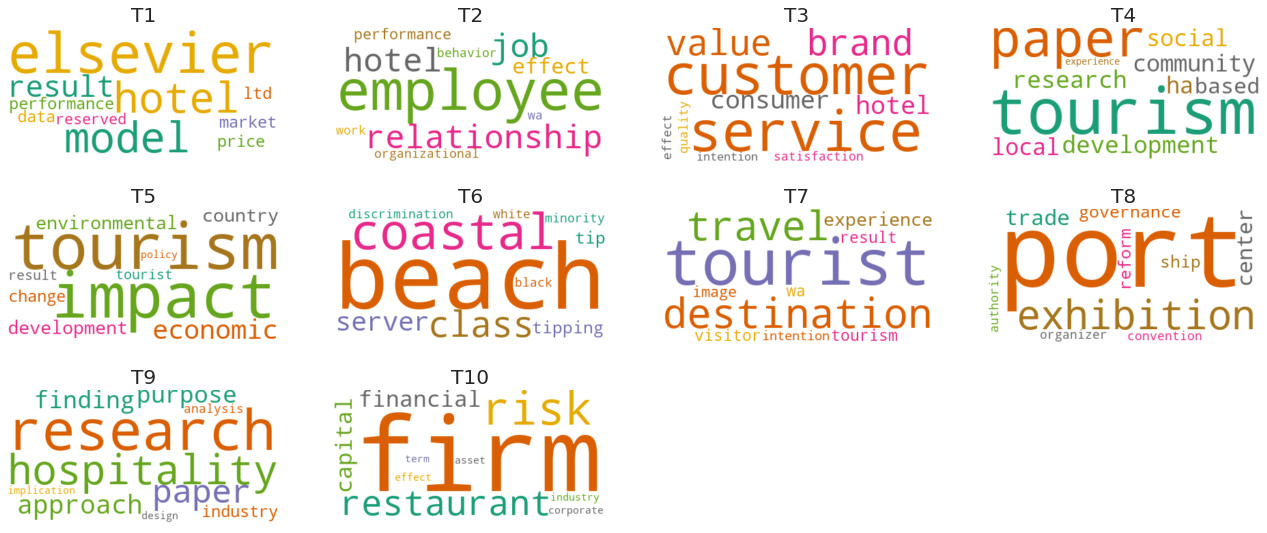

In [ ]:
# Create subplots for each comedian
i=0
for i in range(10):

    wc.generate(text=results_df["Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(results_df["Dominant Topic"][i])
    # print(topic)
    # print(type(topic))
    # print()
    # print()

plt.show()

Source: Dipanjan Sarkar - Text Analytics with Python_ A Practitioner's Guide to Natural Language Processing